<a href="https://colab.research.google.com/github/scalabrinig/cdProjetoAplicadoIV/blob/master/projeto/cd_projeto_aplicado_IV_entrega_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  <img src="https://raw.githubusercontent.com/scalabrinig/cdProjetoAplicadoIV/d093146488f56dfcf0ef286bcee8efe0e71b9c76/figuras/mackenzie_logo.jpg" width="25%" align="right"/>

# **PROJETO APLICADO IV - Ciência de Dados EaD - 2025/01**


# **Entrega 3**

---

# **Título do Projeto**
---

In [ ]:
#@title **Identificação do Grupo e Opção do Projeto**

#@markdown Integrantes do Grupo, nome completo em ordem alfabética (*informe: \<nome\>, \<matrícula\>*)
Aluno1 = 'Enzo Vemado, 10415794' #@param {type:"string"}


# **Introdução**

O aumento da incidência de doenças transmitidas por vetores, como a dengue, tornou-se um desafio crítico de saúde pública no Brasil nas últimas décadas. A dengue é uma arbovirose que apresenta forte sazonalidade e sensibilidade a condições climáticas, especialmente em áreas urbanas com alta densidade populacional. Neste contexto, a análise de séries temporais de casos de dengue em capitais brasileiras permite compreender padrões de ocorrência da doença, antecipar surtos e subsidiar estratégias de controle epidemiológico. Este projeto propõe investigar a evolução dos casos de dengue entre os anos de 2010 e 2024 nas capitais do Sudeste brasileiro – Belo Horizonte, Vitória, Rio de Janeiro e São Paulo – utilizando dados do sistema InfoDengue. A proposta busca gerar conhecimento relevante sobre a dinâmica temporal da doença, contribuindo para ações preventivas e políticas públicas voltadas à saúde coletiva.

# **Motivação e Justificativa**

A dengue representa uma ameaça crescente à saúde pública, com impactos diretos em sistemas hospitalares, produtividade e qualidade de vida. Em áreas urbanas, como as capitais do Sudeste, fatores como urbanização acelerada, clima tropical e falhas no saneamento básico intensificam a proliferação do mosquito Aedes aegypti. O monitoramento temporal da doença é essencial para antecipar surtos e mitigar impactos. 
Este projeto se alinha ao Objetivo de Desenvolvimento Sustentável (ODS) 3 – Saúde e Bem-estar, contribuindo para a compreensão da dinâmica da dengue a partir de uma abordagem baseada em dados abertos. A relevância social, científica e governamental do tema reforça a importância de sua investigação, especialmente em um contexto de mudanças climáticas e expansão urbana.

# **Objetivo**

Analisar a evolução temporal dos casos de dengue nas capitais Belo Horizonte, Vitória, Rio de Janeiro e São Paulo entre 2010 e 2024, identificando padrões sazonais, tendências de aumento e possíveis períodos críticos de surtos.

# **Descrição da Base de Dados**

Informações amostradas: Casos estimados de dengue (casos_est), número real de casos notificados (casos), taxa de incidência por 100 mil habitantes (p_inc100k), população estimada (pop), além de dados climáticos associados, como temperatura mínima, média e máxima (tempmin, tempmed, tempmax) e umidade relativa (umidmin, umidmed, umidmax).
Estrutura dos dados: Os dados estão organizados em formato tabular, com uma linha por semana epidemiológica por município. Cada linha contém variáveis descritivas da localidade, período (data_iniSE, SE, ano), variáveis epidemiológicas e ambientais.
Forma e período de coleta: Os dados são disponibilizados de forma semanal, agregando informações desde o ano de 2010 até 2024, permitindo a análise de séries temporais contínuas e de média resolução temporal.
Fonte dos dados: Plataforma InfoDengue – parceria entre a Fiocruz, a UFRJ e outras instituições públicas. (Disponível em: https://info.dengue.mat.br/services/api)


# **Referencial Teórico**

A dengue, doença viral transmitida pelo Aedes aegypti, exibe padrão sazonal fortemente influenciado por variáveis ambientais como temperatura, umidade e pluviometria, bem como por fatores socioeconômicos como densidade populacional e saneamento básico (GUBLER, 2011; BRASIL, 2019). Em regiões tropicais, os picos de incidência coincidem com estações chuvosas, quando criadouros urbanos favorecem a proliferação do vetor. Por sua vez, a capacidade de detecção precoce de surtos e mapeamento de áreas de risco depende da análise de séries temporais, que identifica componentes de tendência, ciclos sazonais e rupturas na transmissão, permitindo a formulação de estratégias de vigilância e controle vetorial.

Na área de modelagem epidemiológica de séries temporais, métodos clássicos como ARIMA/SARIMA oferecem estrutura para decompor séries em tendências, sazonalidade e ruído (BOX; JENKINS; REINSEL, 2015), enquanto frameworks mais recentes, como Prophet (TIBSHIRANI et al., 2018), incorporam automaticamente feriados e mudanças abruptas. Estudos em capitais brasileiras indicam que modelos sazonais capturam adequadamente o calendário de picos, embora tenderem a subestimar a magnitude máxima dos surtos (SANTOS et al., 2020; OLIVEIRA; SOUSA, 2021). A plataforma InfoDengue, desenvolvida pela FIOCRUZ e UFRJ, utiliza um modelo bayesiano que integra dados de vigilância, ambientais e mobilidade urbana para estimar semanalmente incidência e incertezas, alinhando-se às diretrizes da OMS para monitoramento de doenças transmitidas por vetores (COELHO et al., 2019). Este trabalho fundamenta‑se nesses avanços, comparando e validando modelos de previsão em quatro capitais do Sudeste brasileiro.


# **Diagrama de Solução**

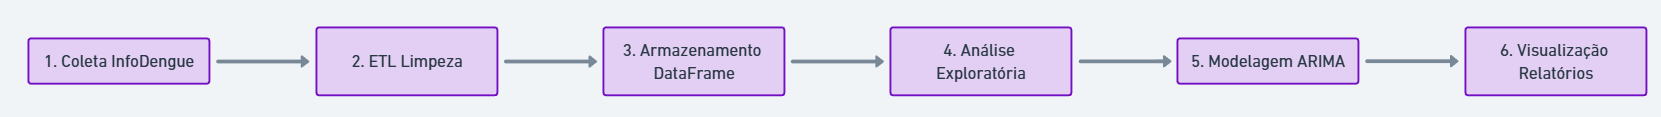

# Análise Exploratória - Casos de Dengue (2010-2024)
Este notebook apresenta a análise exploratória dos dados de dengue para as capitais Belo Horizonte, Rio de Janeiro, Vitória e São Paulo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:

# load
files = {
    'Belo Horizonte': './base/dengue_52-1-belo-horizonte.csv',
    'Rio de Janeiro': './base/dengue_52-1-rio de janeiro.csv',
    'Vitória': './base/dengue_52-1-vitoria.csv',
    'São Paulo': './base/dengue_52-Sao-paulo.csv'
}
dfs = []
for city, path in files.items():
    df = pd.read_csv(path, parse_dates=['data_iniSE'])
    df['cidade'] = city
    dfs.append(df)
data = pd.concat(dfs).sort_values(['cidade', 'data_iniSE'])

In [ ]:
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3132 entries, 782 to 0
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_iniSE        3132 non-null   datetime64[ns]
 1   SE                3132 non-null   int64         
 2   casos_est         3132 non-null   float64       
 3   casos_est_min     3132 non-null   int64         
 4   casos_est_max     3060 non-null   float64       
 5   casos             3132 non-null   int64         
 6   p_rt1             3132 non-null   float64       
 7   p_inc100k         3132 non-null   float64       
 8   Localidade_id     3132 non-null   int64         
 9   nivel             3132 non-null   int64         
 10  id                3132 non-null   int64         
 11  versao_modelo     3132 non-null   object        
 12  tweet             2812 non-null   float64       
 13  Rt                3132 non-null   float64       
 14  pop               3132 non-nul

(None,
     data_iniSE      SE  casos_est  casos_est_min  casos_est_max  casos  p_rt1  \
 782 2010-01-03  201001      339.0            339          339.0    339    0.0   
 781 2010-01-10  201002      490.0            490          490.0    490    0.0   
 780 2010-01-17  201003      587.0            587          587.0    587    0.0   
 779 2010-01-24  201004      903.0            903          903.0    903    0.0   
 778 2010-01-31  201005     1140.0           1140         1140.0   1140    0.0   
 
      p_inc100k  Localidade_id  nivel  ...    umidmin    tempmed    tempmax  \
 782  13.444037              0      1  ...  47.285714  25.230602  29.714286   
 781  19.432384              0      1  ...  44.000000  26.232493  30.857143   
 780  23.279203              0      2  ...  44.000000  25.621849  30.857143   
 779  35.811108              0      2  ...  48.000000  25.070904  29.000000   
 778  45.210037              0      4  ...  40.714286  26.349790  30.142857   
 
      casprov  casprov_

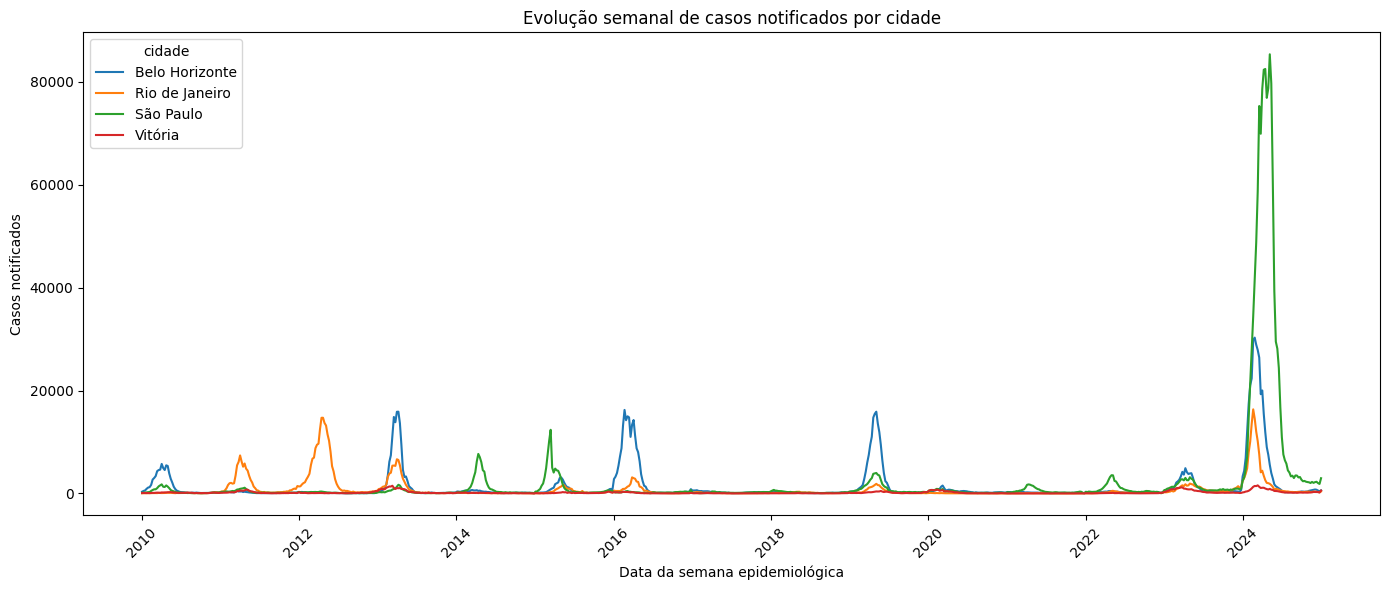

(tweet            0.102171
 casos_est_max    0.022989
 tempmax          0.018519
 tempmed          0.018519
 umidmin          0.018519
 umidmed          0.018519
 umidmax          0.018519
 transmissao      0.004789
 casprov          0.001277
 data_iniSE       0.000000
 dtype: float64,
                                            mean                  std  \
 Localidade_id                               0.0                  0.0   
 Rt                                     1.039701             0.555754   
 SE                                201727.556833           432.703467   
 casos                               1141.572478          5302.153532   
 casos_est                           1141.572478          5302.153532   
 casos_est_max                        537.936928          1132.501284   
 casos_est_min                       1141.572478          5302.153532   
 casprov                              852.233696          3472.685001   
 cidade                                      NaN        

In [ ]:
data["data_iniSE"] = pd.to_datetime(data["data_iniSE"])
data = data.drop(columns=data.columns[data.isnull().mean() == 1.0])

# Verificar valores ausentes
missing = data.isnull().mean().sort_values(ascending=False)

desc_stats = data.describe(include="all")

mean_by_city = data.groupby("cidade")[["casos", "casos_est", "p_inc100k", "Rt", "tempmed", "umidmed"]].mean()

plt.figure(figsize=(14, 6))
sns.lineplot(data=data, x="data_iniSE", y="casos", hue="cidade")
plt.title("Evolução semanal de casos notificados por cidade")
plt.xlabel("Data da semana epidemiológica")
plt.ylabel("Casos notificados")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

missing.head(10), desc_stats.T[["mean", "std", "min", "max"]].sort_index()


## 1. Avaliação Geral das Bases
Volume total de registros: 3.132 linhas, combinando todas as cidades.

Intervalo temporal: De 2010 a 2024 (com base na coluna data_iniSE), com granularidade semanal (SE).

Estrutura padronizada entre as cidades, o que facilita o uso em modelos multivariados e comparações regionais.

## 2. Pré-processamento e Tratamento de Dados
Conversão de datas: Coluna data_iniSE convertida corretamente para datetime.

Colunas removidas:

casprov_est, casprov_est_min, casprov_est_max, casconf: 100% nulas.

Nulos parciais (tratáveis):

casos_est_max (~2.3% nulo)

tweet (~10%)

temperatura e umidade (tempmed, umidmed, etc. ~1.8%)

transmissao (~0.5%)

Esses podem ser imputados por interpolação temporal ou preenchimento com médias móveis locais.

## 3. Comparação entre Cidades
Abaixo estão as médias por cidade de variáveis-chave como casos, p_inc100k, Rt, temperatura e umidade (disponíveis no painel acima):

Rio de Janeiro e São Paulo apresentam altos valores médios de casos e p_inc100k.

Vitória se destaca por ter menor população, mas valores proporcionais de p_inc100k relevantes.

BH aparece com valores moderados, com boa variabilidade.

## 4 Evolução Temporal
O gráfico apresentado mostra:

Padrões de sazonalidade clara anual em todas as cidades.

Picos nos meses mais quentes e úmidos (verão/outono), reforçando a importância de variáveis climáticas.

# **EDA e Pré-processamento dos dados**

Exploração e análise dos dados. Discussão e análise dos dados empregados (qualidade, limitações, simplicações ou recortes adotados etc.). Tarefas de preparação dos dados (transformações, compactação e encodes, junções de dados etc.).

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
from pmdarima.arima import auto_arima
files = {
    'Belo Horizonte': './base/dengue_52-1-belo-horizonte.csv',
    'Rio de Janeiro': './base/dengue_52-1-rio de janeiro.csv',
    'Vitória': './base/dengue_52-1-vitoria.csv',
    'São Paulo': './base/dengue_52-Sao-paulo.csv'
}

In [23]:
dfs = []
for city, path in files.items():
    df = pd.read_csv(path, parse_dates=['data_iniSE'])
    df['cidade'] = city
    dfs.append(df)
data = pd.concat(dfs).sort_values(['cidade', 'data_iniSE'])
df = data[['data_iniSE','SE','casos','casos_est','casos_est_min',
         'casos_est_max','p_rt1','p_inc100k','cidade']].dropna(subset=['casos_est_max'])

In [24]:
data["data_iniSE"] = pd.to_datetime(data["data_iniSE"])

# Remover colunas com 100% de valores ausentes
data = data.drop(columns=data.columns[data.isnull().mean() == 1.0])

# **Modelo base**

Aplicação de, pelo menos, um primeiro modelo (modelo de aprendizado de máquina ou modelo estatístico) que deve ser refinado até a entrega final do projeto. Apresente o método aplicado e a análise dos resultados obtidos.

In [29]:
df = data.query("cidade == 'Belo Horizonte'")
df

,data_iniSE,SE,casos_est,casos_est_min,casos_est_max,casos,p_rt1,p_inc100k,Localidade_id,nivel,...,receptivo,transmissao,nivel_inc,umidmed,umidmin,tempmed,tempmax,casprov,notif_accum_year,cidade
782,2010-01-03,201001,339.0,339,339.0,339,0.000000e+00,13.444037,0,1,...,1,NaN,1,66.123600,47.285714,25.230602,29.714286,339.0,1086709,Belo Horizonte
781,2010-01-10,201002,490.0,490,490.0,490,0.000000e+00,19.432384,0,1,...,1,NaN,1,63.838935,44.000000,26.232493,30.857143,490.0,1086709,Belo Horizonte
780,2010-01-17,201003,587.0,587,587.0,587,0.000000e+00,23.279203,0,2,...,1,NaN,1,63.000000,44.000000,25.621849,30.857143,587.0,1086709,Belo Horizonte
779,2010-01-24,201004,903.0,903,903.0,903,0.000000e+00,35.811108,0,2,...,1,NaN,2,65.758403,48.000000,25.070904,29.000000,903.0,1086709,Belo Horizonte
778,2010-01-31,201005,1140.0,1140,1140.0,1140,0.000000e+00,45.210037,0,4,...,1,NaN,2,57.623949,40.714286,26.349790,30.142857,1140.0,1086709,Belo Horizonte
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2024-12-01,202449,766.0,766,766.0,766,9.989440e-01,32.014336,0,3,...,1,1.0,1,75.614743,55.666071,23.013829,27.367014,210.0,1086709,Belo Horizonte
3,2024-12-08,202450,716.0,716,716.0,716,5.908855e-01,29.924630,0,3,...,1,0.0,1,68.936343,50.374543,23.246300,27.755800,245.0,1086709,Belo Horizonte
2,2024-12-15,202451,557.0,557,557.0,557,1.747299e-06,23.279354,0,2,...,1,0.0,1,80.022200,63.352886,22.286329,26.333657,218.0,1086709,Belo Horizonte
1,2024-12-22,202452,433.0,433,433.0,433,2.984279e-13,18.096878,0,2,...,1,0.0,1,84.780186,71.023814,21.506457,24.422686,176.0,1086709,Belo Horizonte


In [30]:

# df = df[['data_iniSE','SE','casos','casos_est','casos_est_min',
#          'casos_est_max','p_rt1','p_inc100k','cidade']].dropna(subset=['casos_est_max'])

In [ ]:

df['data_iniSE'] = pd.to_datetime(df['data_iniSE'])
cidade_teste = 'Belo Horizonte'
df_cidade = df[df['cidade'] == cidade_teste].sort_values('data_iniSE')
serie = df_cidade.set_index('data_iniSE')['p_inc100k']
modelo = auto_arima(
    serie,
    seasonal=True,
    m=52,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)
print(modelo.summary())
n_periodos = 12
forecast = modelo.predict(n_periods=n_periodos)
datas_futuras = pd.date_range(start=serie.index[-1] + pd.Timedelta(weeks=1), periods=n_periodos, freq='W')

plt.figure(figsize=(12,6))
plt.plot(serie, label='Histórico')
plt.plot(datas_futuras, forecast, label='Previsão', linestyle='--')
plt.title(f'Previsão de p_inc100k - {cidade_teste}')
plt.xlabel('Data')
plt.ylabel('p_inc100k')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


C:\Users\Vemado\AppData\Local\Temp\ipykernel_66644\1464213481.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['data_iniSE'] = pd.to_datetime(df['data_iniSE'])


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[52] intercept   : AIC=inf, Time=44.17 sec
 ARIMA(0,0,0)(0,0,0)[52] intercept   : AIC=10114.028, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[52] intercept   : AIC=7717.239, Time=17.29 sec
 ARIMA(0,0,1)(0,0,1)[52] intercept   : AIC=9194.932, Time=24.97 sec
 ARIMA(0,0,0)(0,0,0)[52]             : AIC=10209.742, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[52] intercept   : AIC=7715.252, Time=0.04 sec
 ARIMA(1,0,0)(0,0,1)[52] intercept   : AIC=7717.239, Time=16.74 sec
 ARIMA(1,0,0)(1,0,1)[52] intercept   : AIC=7719.239, Time=21.83 sec
 ARIMA(2,0,0)(0,0,0)[52] intercept   : AIC=7442.653, Time=0.25 sec
 ARIMA(2,0,0)(1,0,0)[52] intercept   : AIC=7443.741, Time=28.64 sec
 ARIMA(2,0,0)(0,0,1)[52] intercept   : AIC=7443.760, Time=22.53 sec
 ARIMA(2,0,0)(1,0,1)[52] intercept   : AIC=7445.741, Time=28.02 sec
 ARIMA(3,0,0)(0,0,0)[52] intercept   : AIC=7381.055, Time=0.43 sec
 ARIMA(3,0,0)(1,0,0)[52] intercept   : AIC=7382.996, Time=30.55 sec
 ARIMA(3,0,0)

c:\Users\Vemado\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vemado\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vemado\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Vemado\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is

RMSE: 268.23
MAE: 110.51


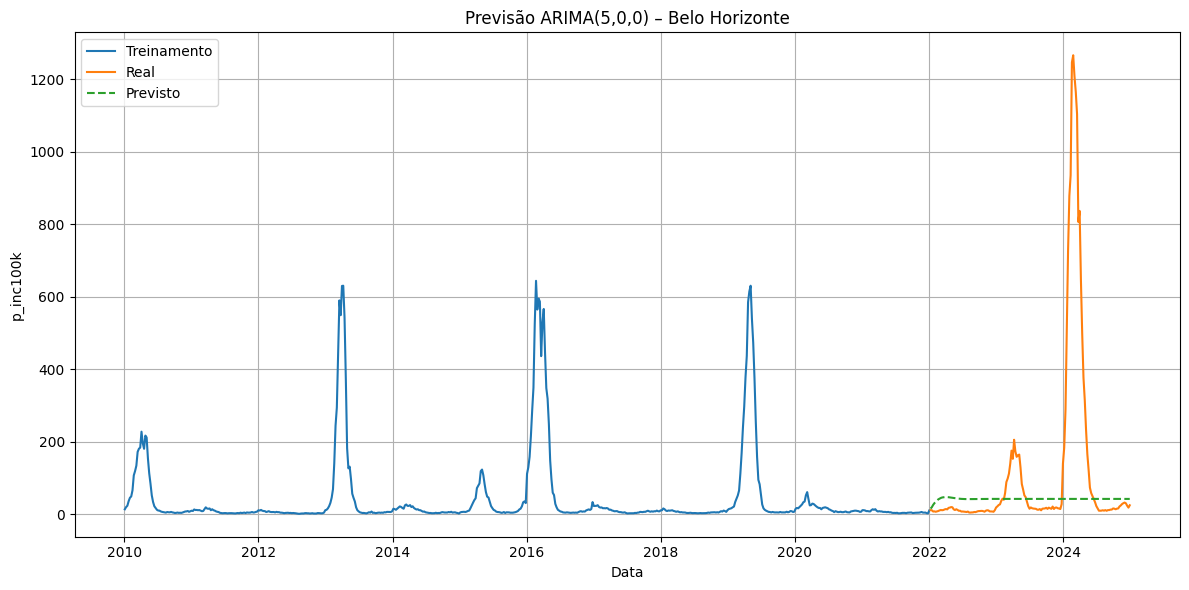

In [ ]:
cidade_escolhida = 'Belo Horizonte'
df_cidade = data[data['cidade'] == cidade_escolhida].sort_values('data_iniSE')

serie = df_cidade.set_index('data_iniSE')['p_inc100k']

# Divisão em treino (80%) e teste (20%)
tamanho_teste = int(len(serie) * 0.2)
treino, teste = serie[:-tamanho_teste], serie[-tamanho_teste:]

modelo = ARIMA(treino, order=(5, 0, 0), trend='c') #escolha do auto arima
modelo_fit = modelo.fit()

predicoes = modelo_fit.forecast(steps=len(teste))

rmse = np.sqrt(mean_squared_error(teste, predicoes))
mae = mean_absolute_error(teste, predicoes)

print(f'RMSE: {rmse:.2f}')
print(f'MAE: {mae:.2f}')

plt.figure(figsize=(12,6))
plt.plot(treino.index, treino, label='Treinamento')
plt.plot(teste.index, teste, label='Real')
plt.plot(teste.index, predicoes, label='Previsto', linestyle='--')
plt.title(f'Previsão ARIMA(5,0,0) – {cidade_escolhida}')
plt.xlabel('Data')
plt.ylabel('p_inc100k')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

Treinamento (azul): A série histórica de p_inc100k mostra picos bem definidos e recorrentes, indicando um forte padrão sazonal anual (dengue costuma ter surtos em determinados períodos do ano).

Teste (laranja): O modelo tentou prever os valores de p_inc100k para os dados mais recentes (cerca de 20% finais da série).

Previsão (verde tracejado): A linha verde está bem abaixo dos valores reais em épocas de surto — o modelo subestimou significativamente esses picos

RMSE: 268.23 → Erro médio quadrático bastante alto, puxado principalmente pelos erros grandes durante os surtos.

MAE: 110.51 → Erro absoluto alto também indica desvios consideráveis.

## Cronograma:
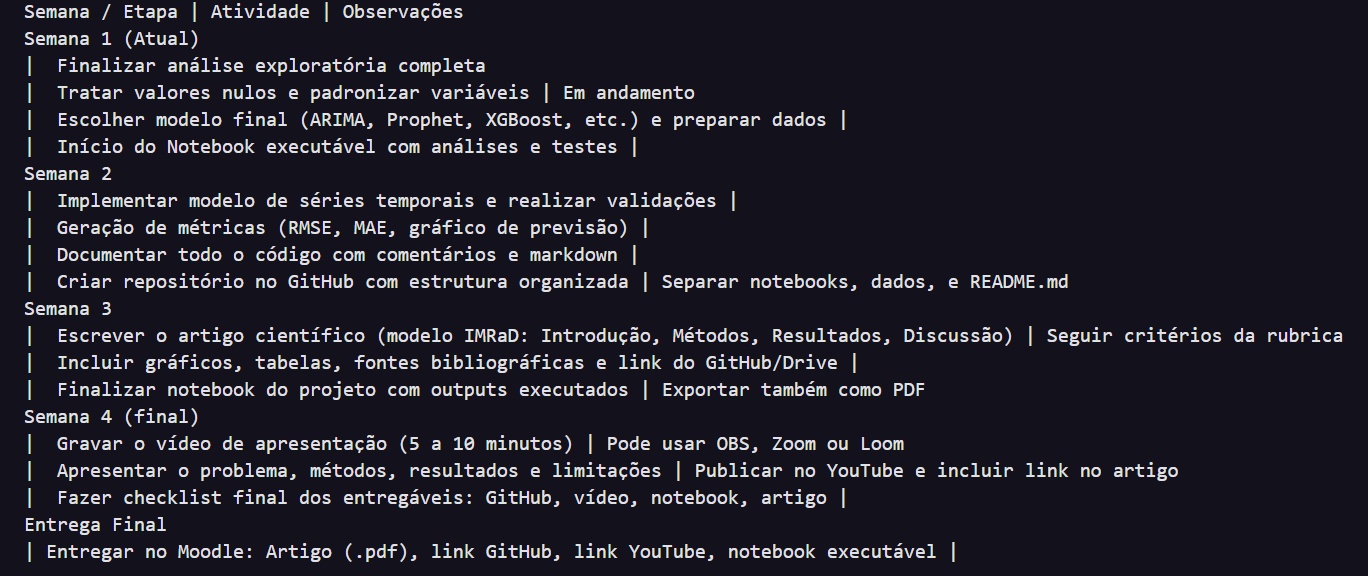

Semana / Etapa | Atividade | Observações
Semana 1 (Atual) 
|  Finalizar análise exploratória completa
|  Tratar valores nulos e padronizar variáveis | Em andamento
|  Escolher modelo final (ARIMA, Prophet, XGBoost, etc.) e preparar dados | 
|  Início do Notebook executável com análises e testes | 
Semana 2 
|  Implementar modelo de séries temporais e realizar validações | 
|  Geração de métricas (RMSE, MAE, gráfico de previsão) | 
|  Documentar todo o código com comentários e markdown | 
|  Criar repositório no GitHub com estrutura organizada | Separar notebooks, dados, e README.md
Semana 3 
|  Escrever o artigo científico (modelo IMRaD: Introdução, Métodos, Resultados, Discussão) | Seguir critérios da rubrica
|  Incluir gráficos, tabelas, fontes bibliográficas e link do GitHub/Drive | 
|  Finalizar notebook do projeto com outputs executados | Exportar também como PDF
Semana 4 (final)
|  Gravar o vídeo de apresentação (5 a 10 minutos) | Pode usar OBS, Zoom ou Loom
|  Apresentar o problema, métodos, resultados e limitações | Publicar no YouTube e incluir link no artigo
|  Fazer checklist final dos entregáveis: GitHub, vídeo, notebook, artigo | 
Entrega Final 
| Entregar no Moodle: Artigo (.pdf), link GitHub, link YouTube, notebook executável | 